In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report


In [2]:
df=pd.read_csv("iris_extended.csv")
df.head()

,species,elevation,soil_type,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,...,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
0,setosa,161.8,sandy,5.16,3.41,1.64,0.26,17.5956,0.4264,1.513196,...,3.146341,13.115385,3.52,3.15,5.33,18.33,53.21,4.194711,0.652993,41.265478
1,setosa,291.4,clay,5.48,4.05,1.53,0.37,22.1940,0.5661,1.353086,...,3.581699,10.945946,3.95,3.68,5.90,20.45,52.53,4.711051,0.752396,39.205087
2,setosa,144.3,sandy,5.10,2.80,1.47,0.38,14.2800,0.5586,1.821429,...,3.469388,7.368421,3.63,2.42,5.66,24.62,50.25,3.778889,0.747395,25.563910
3,setosa,114.6,clay,4.64,3.44,1.53,0.17,15.9616,0.2601,1.348837,...,3.032680,20.235294,3.11,3.27,4.51,22.91,50.85,3.995197,0.510000,61.367166
4,setosa,110.9,loamy,4.85,2.87,1.23,0.26,13.9195,0.3198,1.689895,...,3.943089,11.038462,3.62,2.61,4.03,21.56,40.57,3.730885,0.565509,43.525641


In [3]:
df.shape

(1200, 21)

In [4]:
df.isnull().sum()

species                            0
elevation                          0
soil_type                          0
sepal_length                       0
sepal_width                        0
petal_length                       0
petal_width                        0
sepal_area                         0
petal_area                         0
sepal_aspect_ratio                 0
petal_aspect_ratio                 0
sepal_to_petal_length_ratio        0
sepal_to_petal_width_ratio         0
sepal_petal_length_diff            0
sepal_petal_width_diff             0
petal_curvature_mm                 0
petal_texture_trichomes_per_mm2    0
leaf_area_cm2                      0
sepal_area_sqrt                    0
petal_area_sqrt                    0
area_ratios                        0
dtype: int64

In [5]:

df.nunique()

species                               3
elevation                           950
soil_type                             3
sepal_length                        340
sepal_width                         238
petal_length                        392
petal_width                         241
sepal_area                         1172
petal_area                         1139
sepal_aspect_ratio                 1174
petal_aspect_ratio                 1140
sepal_to_petal_length_ratio        1175
sepal_to_petal_width_ratio         1158
sepal_petal_length_diff             614
sepal_petal_width_diff              534
petal_curvature_mm                  683
petal_texture_trichomes_per_mm2     851
leaf_area_cm2                      1032
sepal_area_sqrt                    1172
petal_area_sqrt                    1139
area_ratios                        1200
dtype: int64

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['species', 'soil_type']

le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print(df[categorical_cols].head())


   species  soil_type
0        0          2
1        0          0
2        0          2
3        0          0
4        0          1


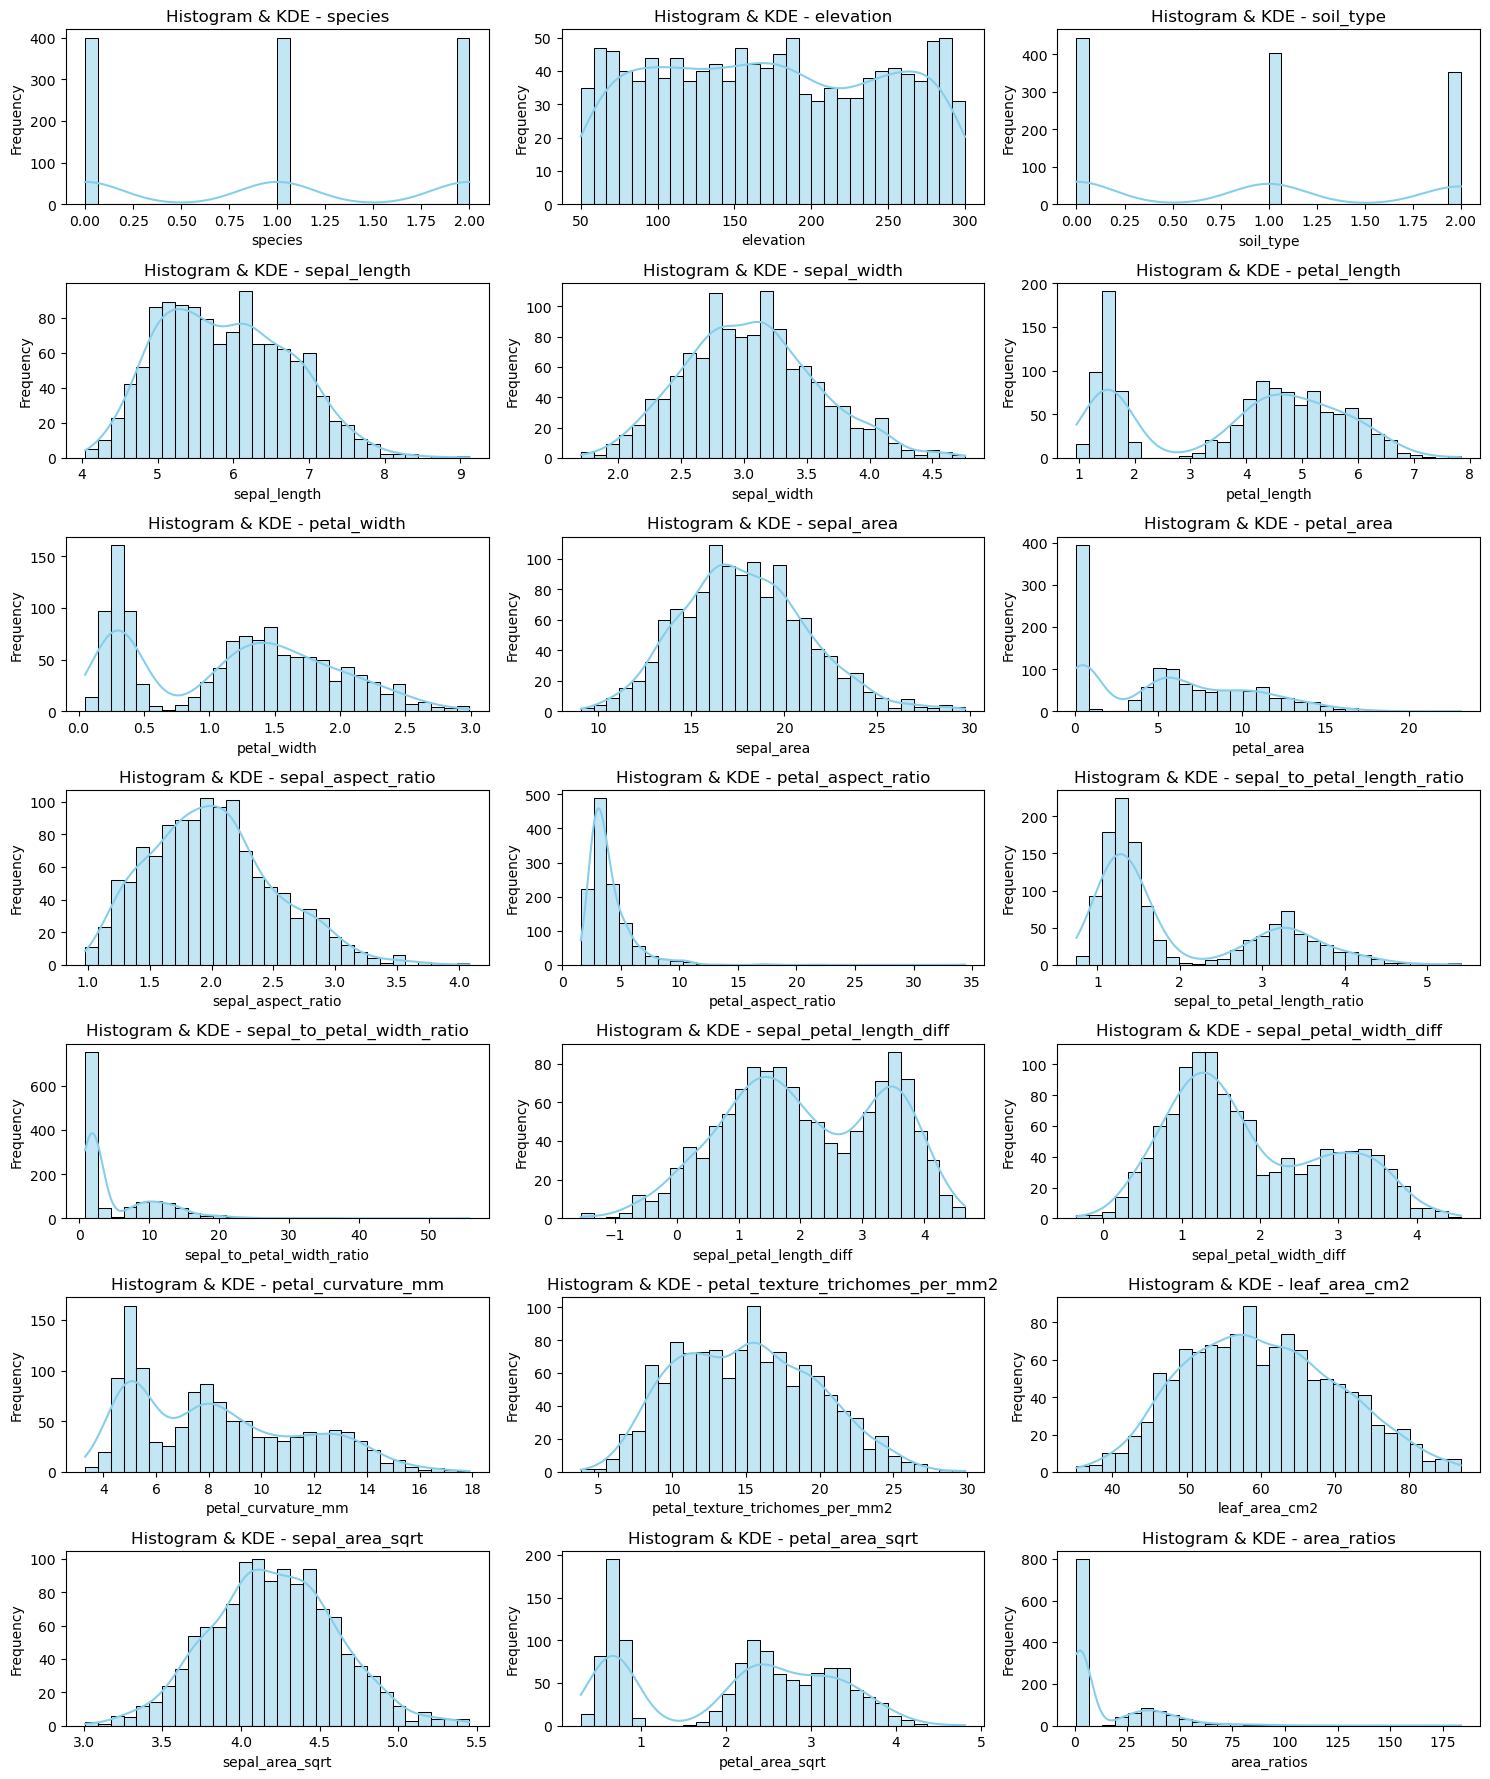

In [7]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


plt.figure(figsize=(15, 20))


for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Histogram & KDE - {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [8]:
skewed_cols = [
    'petal_aspect_ratio',
    'sepal_to_petal_width_ratio',
    'area_ratios'
]

import numpy as np
for col in skewed_cols:
    df[col] = np.log1p(df[col])  


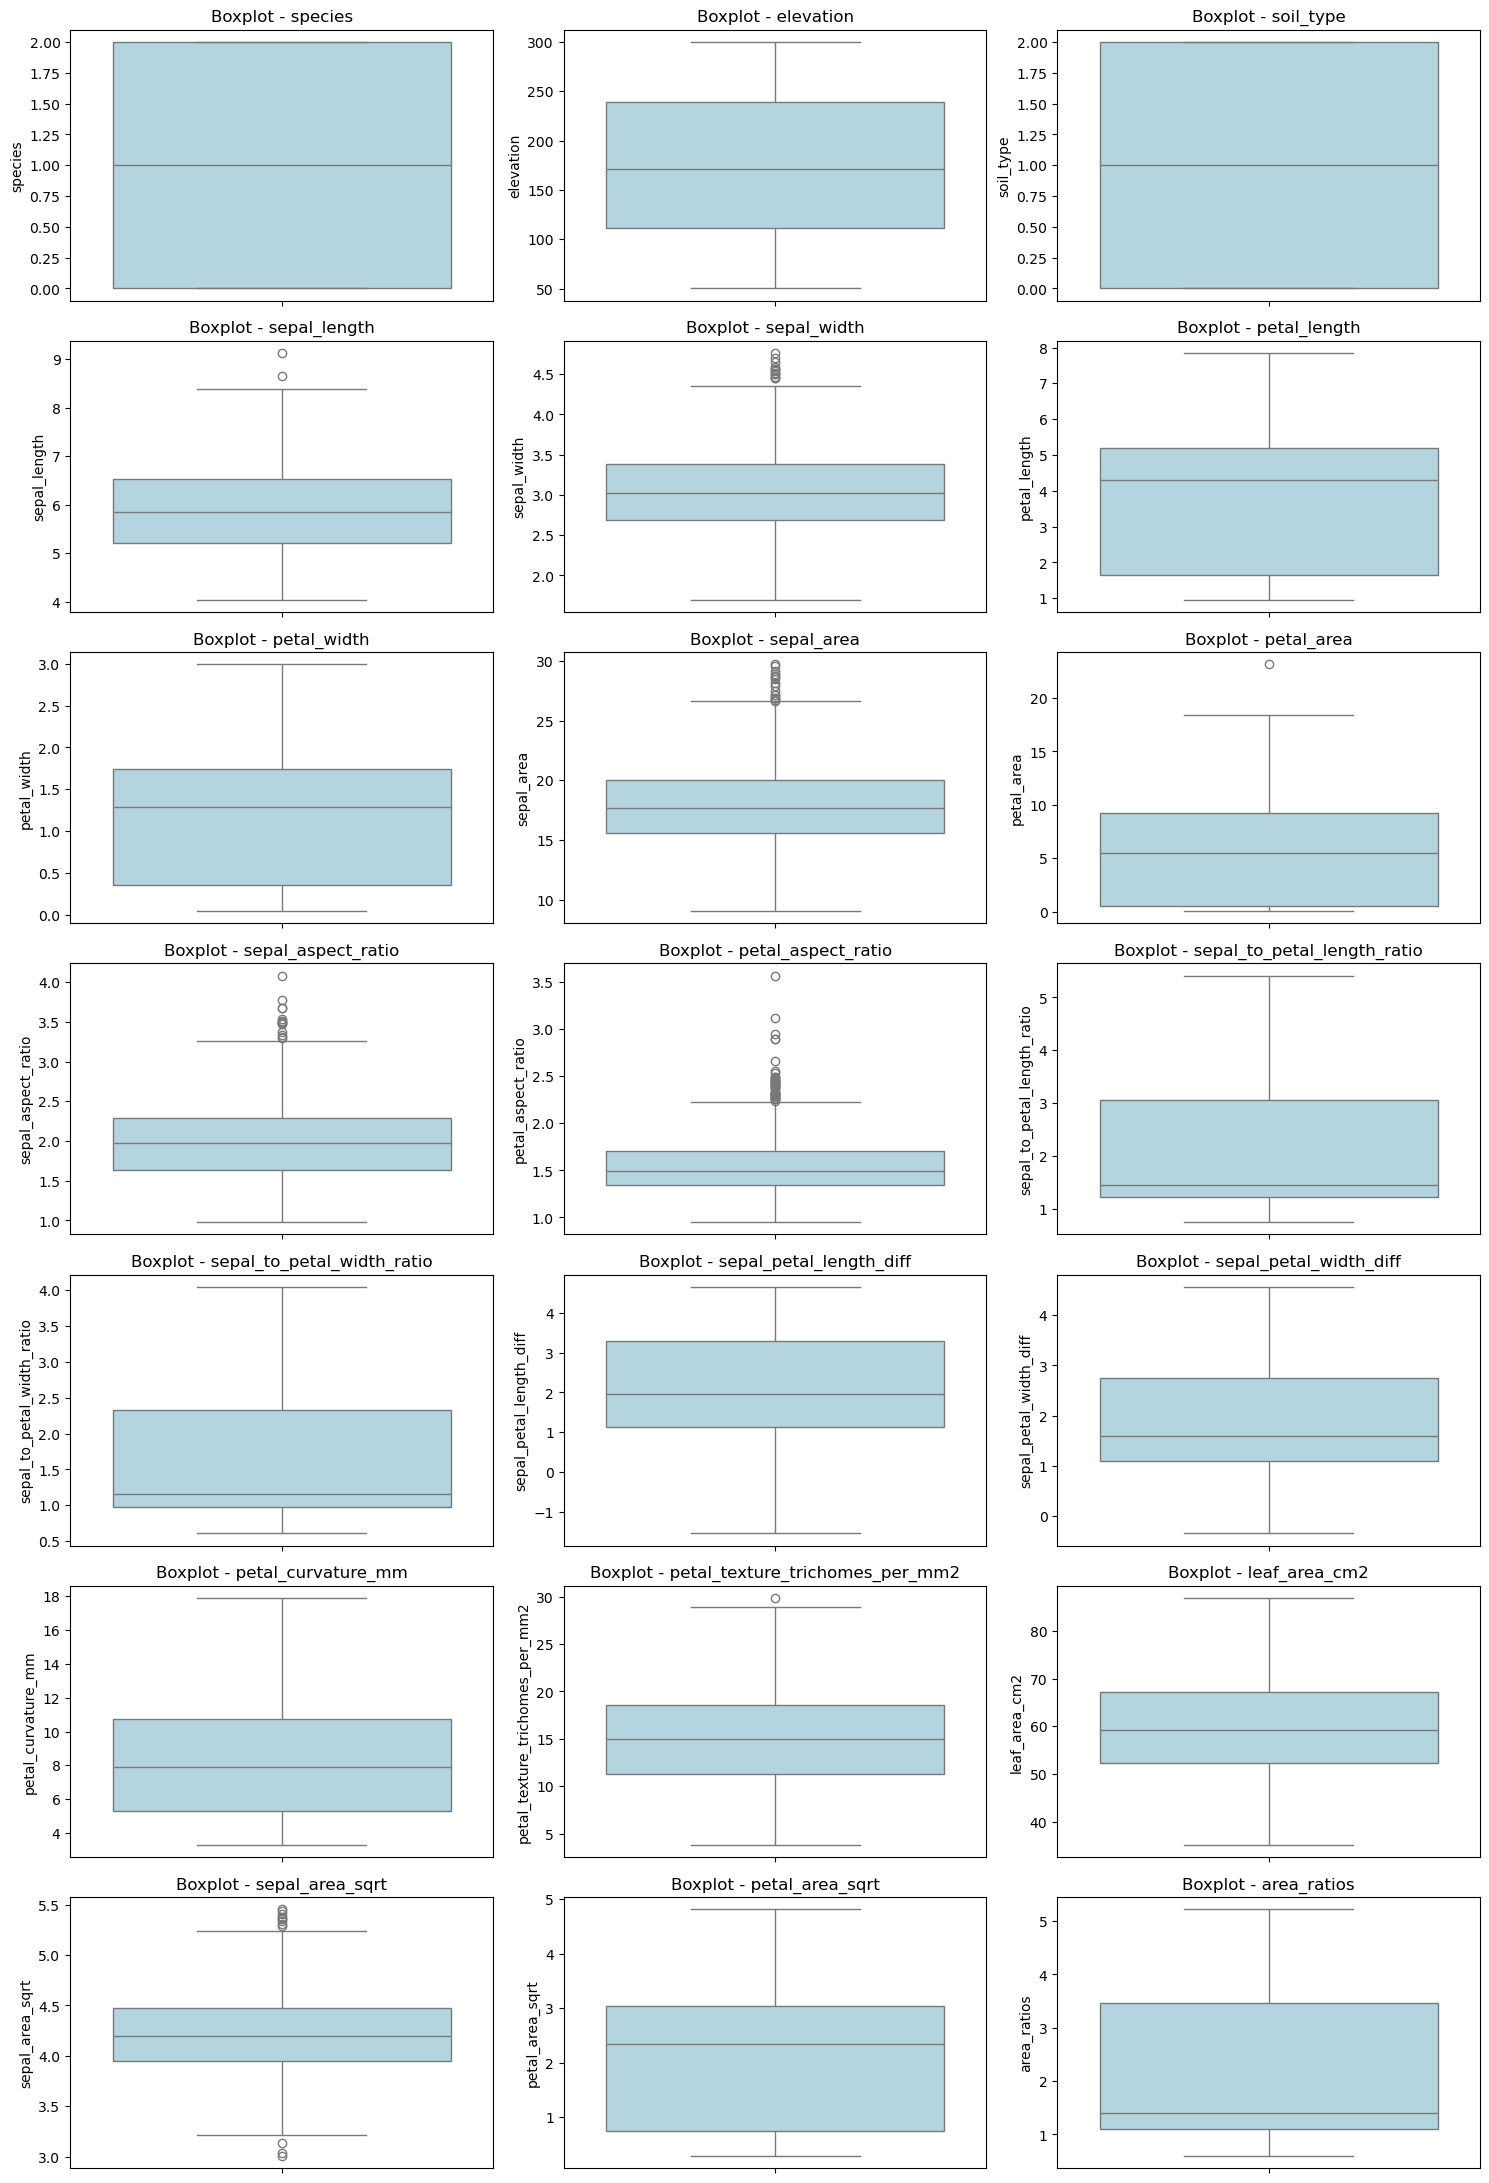

In [9]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


plt.figure(figsize=(15, 25))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot - {col}')

plt.tight_layout()
plt.show()

In [10]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower_limit, upper_limit)

for col in numeric_cols:
    cap_outliers(df, col)

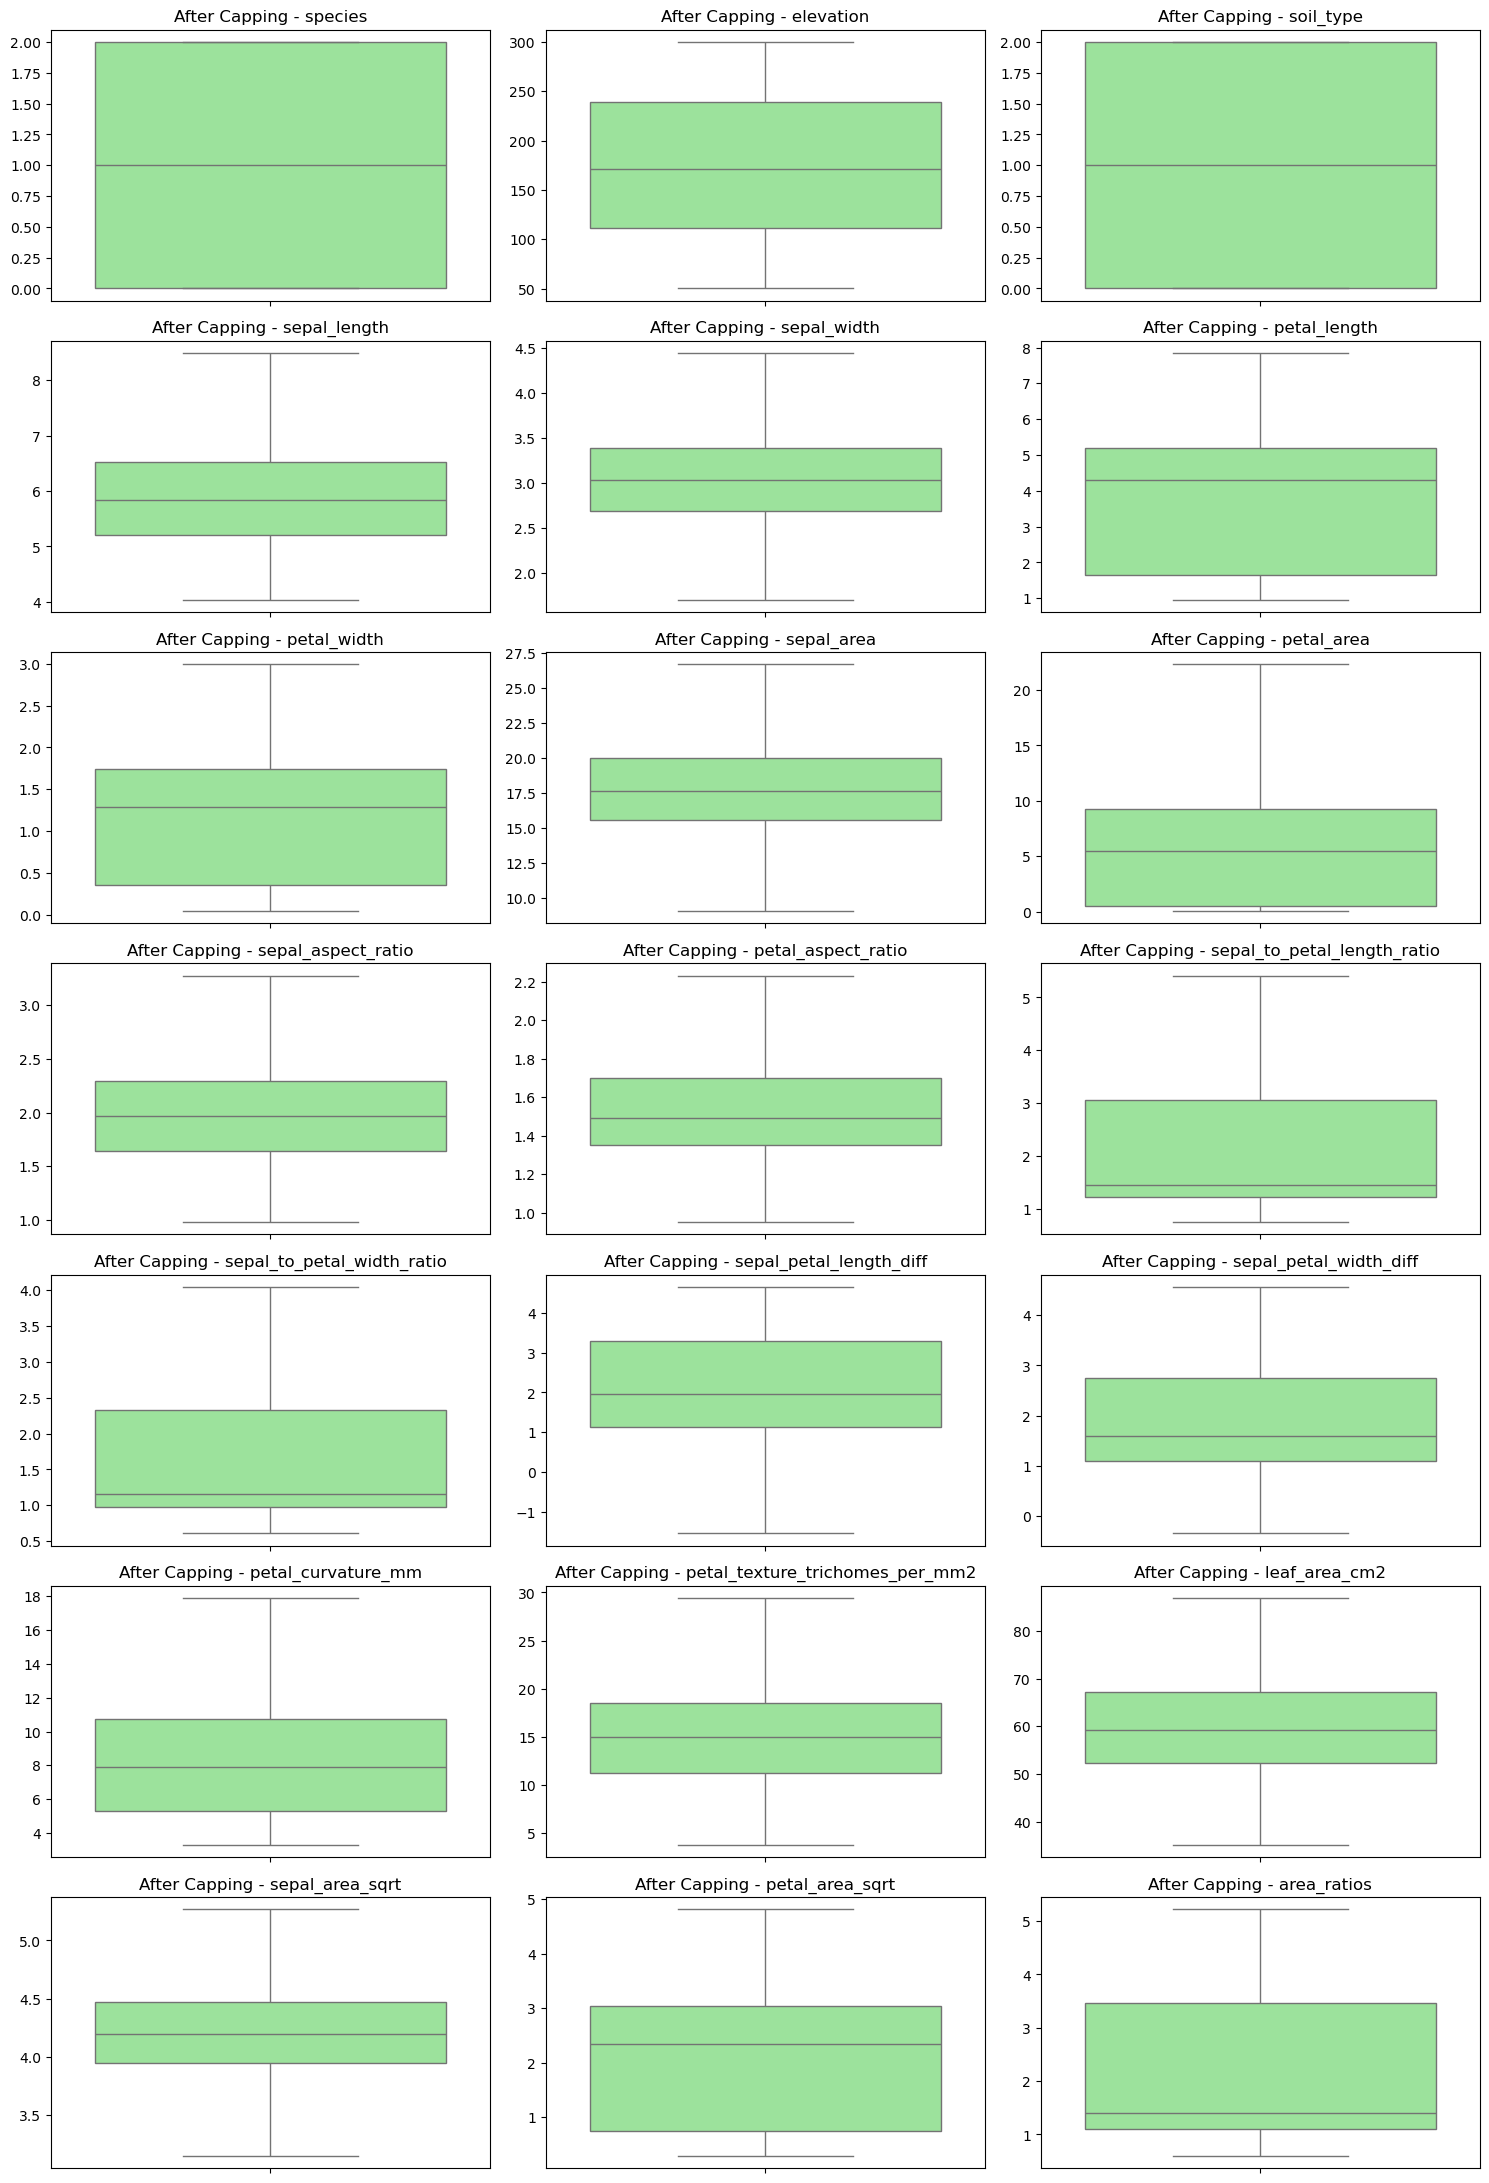

In [11]:
plt.figure(figsize=(15, 25))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'After Capping - {col}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [12]:
df.head()

,species,elevation,soil_type,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,...,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
0,0,161.8,2,5.16,3.41,1.64,0.26,17.5956,0.4264,1.513196,...,3.146341,2.647265,3.52,3.15,5.33,18.33,53.21,4.194711,0.652993,3.743971
1,0,291.4,0,5.48,4.05,1.53,0.37,22.1940,0.5661,1.353086,...,3.581699,2.480392,3.95,3.68,5.90,20.45,52.53,4.711051,0.752396,3.693994
2,0,144.3,2,5.10,2.80,1.47,0.38,14.2800,0.5586,1.821429,...,3.469388,2.124465,3.63,2.42,5.66,24.62,50.25,3.778889,0.747395,3.279554
3,0,114.6,0,4.64,3.44,1.53,0.17,15.9616,0.2601,1.348837,...,3.032680,3.055665,3.11,3.27,4.51,22.91,50.85,3.995197,0.510000,4.133039
4,0,110.9,1,4.85,2.87,1.23,0.26,13.9195,0.3198,1.689895,...,3.943089,2.488107,3.62,2.61,4.03,21.56,40.57,3.730885,0.565509,3.796065


In [13]:
X = df.drop('species', axis=1)
y = df['species']


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)


(960, 20) (240, 20)


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),                                               
    Dense(32, activation='relu'),                               
    Dense(len(y.unique()), activation='softmax')               
])

c:\Users\manos\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=50, 
                    batch_size=16, 
                    verbose=1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8073 - loss: 0.6111 - val_accuracy: 0.9750 - val_loss: 0.2175
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9646 - loss: 0.1846 - val_accuracy: 0.9875 - val_loss: 0.0815
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9802 - loss: 0.0983 - val_accuracy: 0.9958 - val_loss: 0.0441
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9844 - loss: 0.0634 - val_accuracy: 0.9958 - val_loss: 0.0273
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9865 - loss: 0.0416 - val_accuracy: 0.9958 - val_loss: 0.0207
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9917 - loss: 0.0310 - val_accuracy: 0.9958 - val_loss: 0.0220
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9937 - loss: 0.0300 - val_accuracy: 0.9958 - val_loss: 0.0169
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9917 - loss: 0.0278 - val_accuracy: 0.9958 - val_loss:

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.3f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9958 - loss: 0.0091  

Test Accuracy: 0.996


In [20]:
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [21]:
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_classes))


📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       0.99      1.00      0.99        73
           2       1.00      0.99      0.99        80

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [22]:
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))

    # Tune number of hidden layers (1 to 3)
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation=hp.Choice('activation', ['relu', 'tanh'])
        ))
        model.add(layers.Dropout(rate=hp.Float('dropout', 0.0, 0.4, step=0.1)))

    # Output layer
    model.add(layers.Dense(len(y.unique()), activation='softmax'))

    # Optimizer learning rate tuning
    lr = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
    optimizer = keras.optimizers.Adam(learning_rate=lr)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [23]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,              # limit to 5 different model configurations
    executions_per_trial=1,
    directory='ann_tuning',
    project_name='iris_hyperparam_tuning'
)

Reloading Tuner from ann_tuning\iris_hyperparam_tuning\tuner0.json


In [24]:
stop_early = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)


In [25]:
tuner.search(X_train, y_train,
             epochs=15,                # fewer epochs = faster
             validation_data=(X_test, y_test),
             callbacks=[stop_early],
             verbose=1)

In [26]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
🎯 Best hyperparameters found:
- Hidden layers: {best_hps.get('num_layers')}
- Units per layer: {[best_hps.get(f'units_{i}') for i in range(best_hps.get('num_layers'))]}
- Activation: {best_hps.get('activation')}
- Dropout: {best_hps.get('dropout')}
- Learning rate: {best_hps.get('learning_rate')}
""")


🎯 Best hyperparameters found:
- Hidden layers: 2
- Units per layer: [192, 32]
- Activation: relu
- Dropout: 0.2
- Learning rate: 0.008367811950596679



In [27]:
best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(X_train, y_train,
                         validation_data=(X_test, y_test),
                         epochs=30,
                         batch_size=16,
                         callbacks=[stop_early],
                         verbose=1)

Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9375 - loss: 0.1594 - val_accuracy: 0.9958 - val_loss: 0.0289
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9885 - loss: 0.0437 - val_accuracy: 0.9917 - val_loss: 0.0209
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9896 - loss: 0.0282 - val_accuracy: 0.9958 - val_loss: 0.0094
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9906 - loss: 0.0292 - val_accuracy: 0.9833 - val_loss: 0.0288
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9875 - loss: 0.0346 - val_accuracy: 0.9958 - val_loss: 0.0048
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9937 - loss: 0.0221 - val_accuracy: 0.9917 - val_loss: 0.0160
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9927 - loss: 0.0176 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9937 - loss: 0.0278 - val_accuracy: 0.9875 - val_loss:

In [28]:
loss, acc = best_model.evaluate(X_test, y_test)
print(f"\n Final Tuned Model Accuracy: {acc:.3f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0045  

 Final Tuned Model Accuracy: 1.000


In [29]:
import pickle
pickle.dump(scaler, open("scaler.pkl", "wb"))


In [30]:
# 💾 Save the best ANN model
best_model.save("best_ann_model.h5")
print("✅ Model saved successfully as best_ann_model.h5")

# 🔍 Verify
import os
print("Model file exists:", os.path.exists("best_ann_model.h5"))


✅ Model saved successfully as best_ann_model.h5
Model file exists: True
